<a href="https://colab.research.google.com/github/Muhammad-Ahmad-Faizan/Data-Visualization/blob/main/TitanicDataset_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Linear Regression & Logistic Regression**

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score

In [34]:
data = pd.read_csv('titanic.csv')

In [9]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

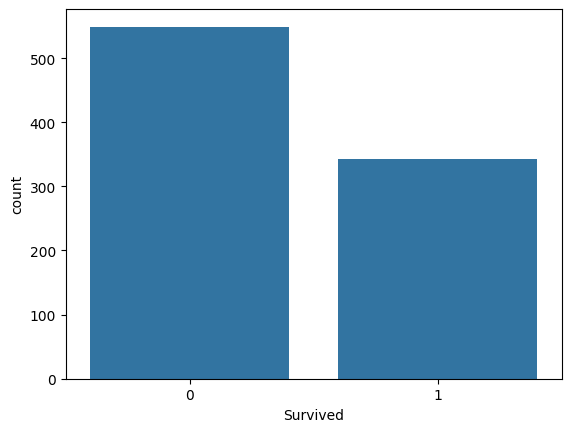

In [7]:
sns.countplot(x='Survived', data=data)

<Axes: xlabel='Survived', ylabel='count'>

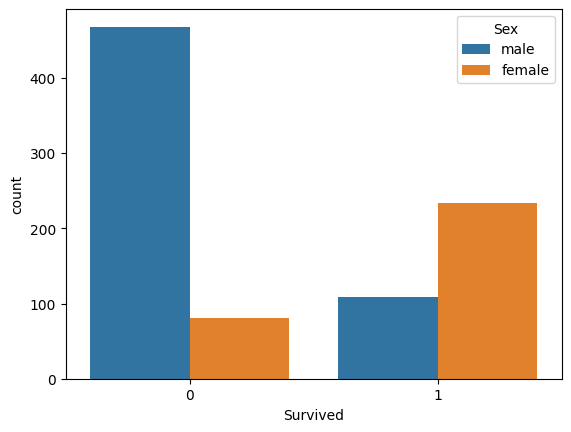

In [8]:
sns.countplot(x='Survived', hue='Sex', data=data)

<Axes: xlabel='Survived', ylabel='count'>

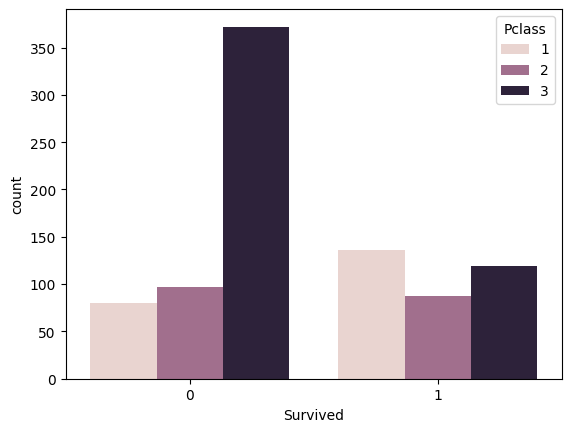

In [10]:
sns.countplot(x='Survived', hue='Pclass', data=data)

<Axes: xlabel='Age', ylabel='Count'>

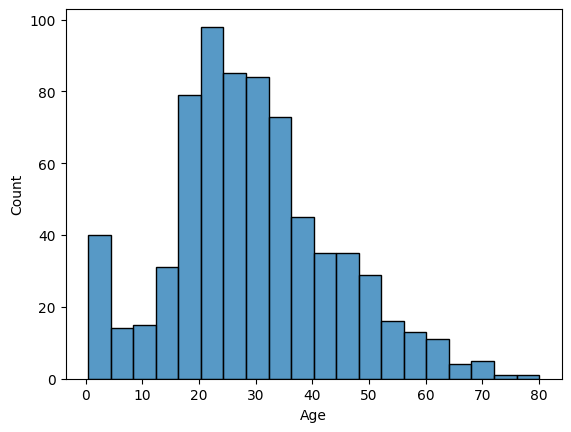

In [14]:
sns.histplot(data=data['Age'])

<Axes: xlabel='Fare', ylabel='Count'>

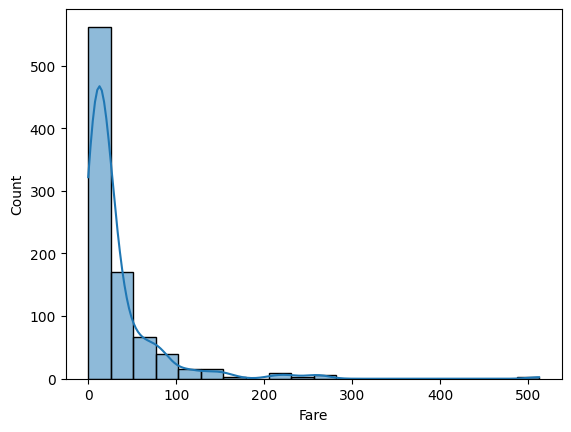

In [15]:
sns.histplot(data=data['Fare'], bins=20, kde=True)

<Axes: xlabel='SibSp', ylabel='count'>

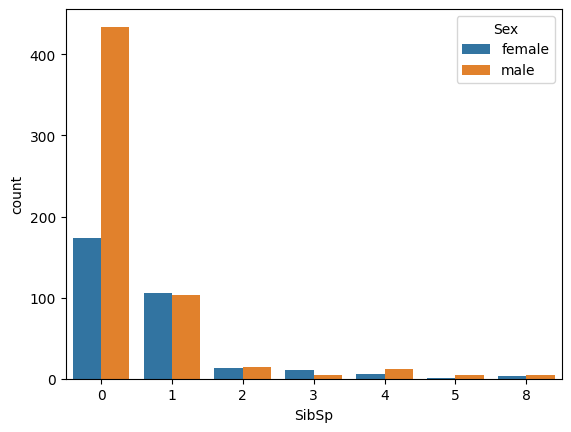

In [17]:
sns.countplot(x='SibSp', hue='Sex',data=data)

In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

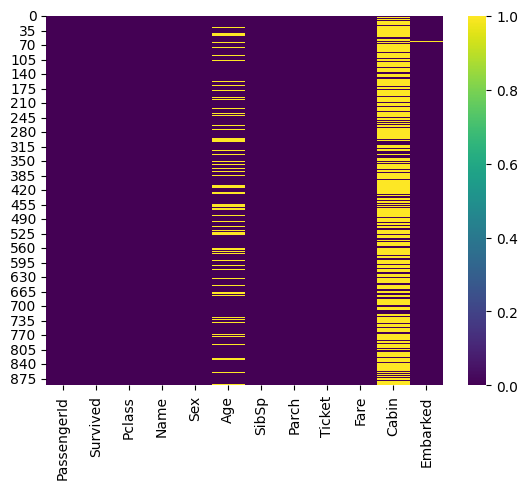

In [19]:
sns.heatmap(data=data.isnull(), cmap='viridis')

In [36]:
data.drop('Cabin', axis=1, inplace=True)

<Axes: >

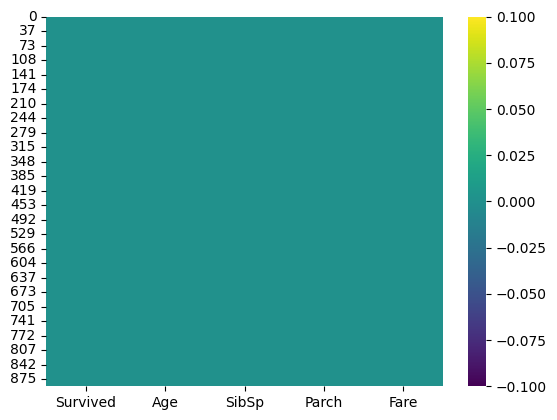

In [37]:
data.dropna(inplace=True)
sns.heatmap(data=data.isnull(), cmap='viridis')

In [38]:
data.head(2)

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833


<Axes: xlabel='Pclass', ylabel='Age'>

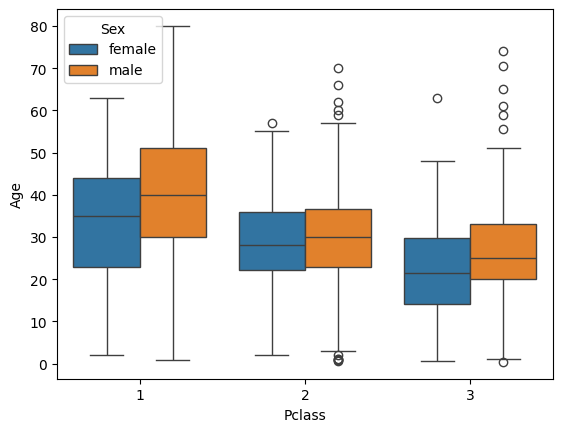

In [23]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=data)

In [24]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [26]:
Sex=pd.get_dummies(data['Sex'], drop_first=True).astype(int)
Embarked=pd.get_dummies(data['Embarked'], drop_first=True).astype(int)
Pclass=pd.get_dummies(data['Pclass'], drop_first=True).astype(int)

In [28]:
Sex.head(2)
Embarked.head(2)
Pclass.head(2)

,2,3
0,0,1
1,0,0


In [39]:
data=pd.concat([data, Sex, Embarked, Pclass], axis=1)
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,1.0,0.0,1.0,0.0,1.0


In [35]:
data.drop(['PassengerId', 'Name', 'Sex', 'Pclass', 'Ticket', 'Embarked'], axis=1, inplace=True)
data.head()

,Survived,Age,SibSp,Parch,Fare,Cabin
0,0,22.0,1,0,7.2500,NaN
1,1,38.0,1,0,71.2833,C85
2,1,26.0,0,0,7.9250,NaN
3,1,35.0,1,0,53.1000,C123
4,0,35.0,0,0,8.0500,NaN


In [40]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,1.0,0.0,1.0,0.0,1.0


In [48]:
data.isnull().sum()

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
2           0
3           0
dtype: int64

In [47]:
data.dropna(inplace=True)

In [49]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_train.columns.astype(str)

In [51]:
lin_model=LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred=lin_model.predict(X_test)
r2_score(y_test, y_pred)

0.41448113457675906

In [53]:
mean_squared_error(y_test, y_pred)

0.14325660411440994

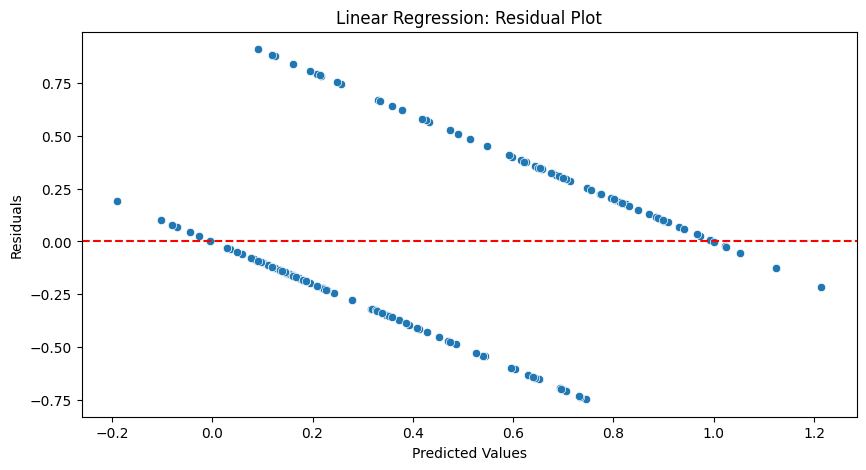

In [67]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residual Plot")
plt.axhline(0, color='red', linestyle='--')
plt.show()


In [54]:
rg_model=LogisticRegression()
rg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
prediction=rg_model.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81       102\n           1       0.75      0.74      0.74        76\n\n    accuracy                           0.78       178\n   macro avg       0.78      0.78      0.78       178\nweighted avg       0.78      0.78      0.78       178\n'

In [68]:
conf_matrix= confusion_matrix(y_test, prediction)

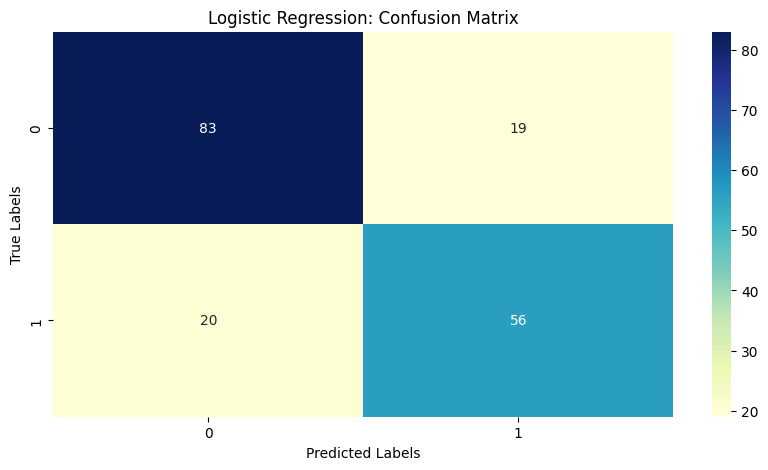

In [69]:
# Plotting confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression: Confusion Matrix")
plt.show()

In [60]:
accuracy_score(y_test, prediction)

0.7808988764044944

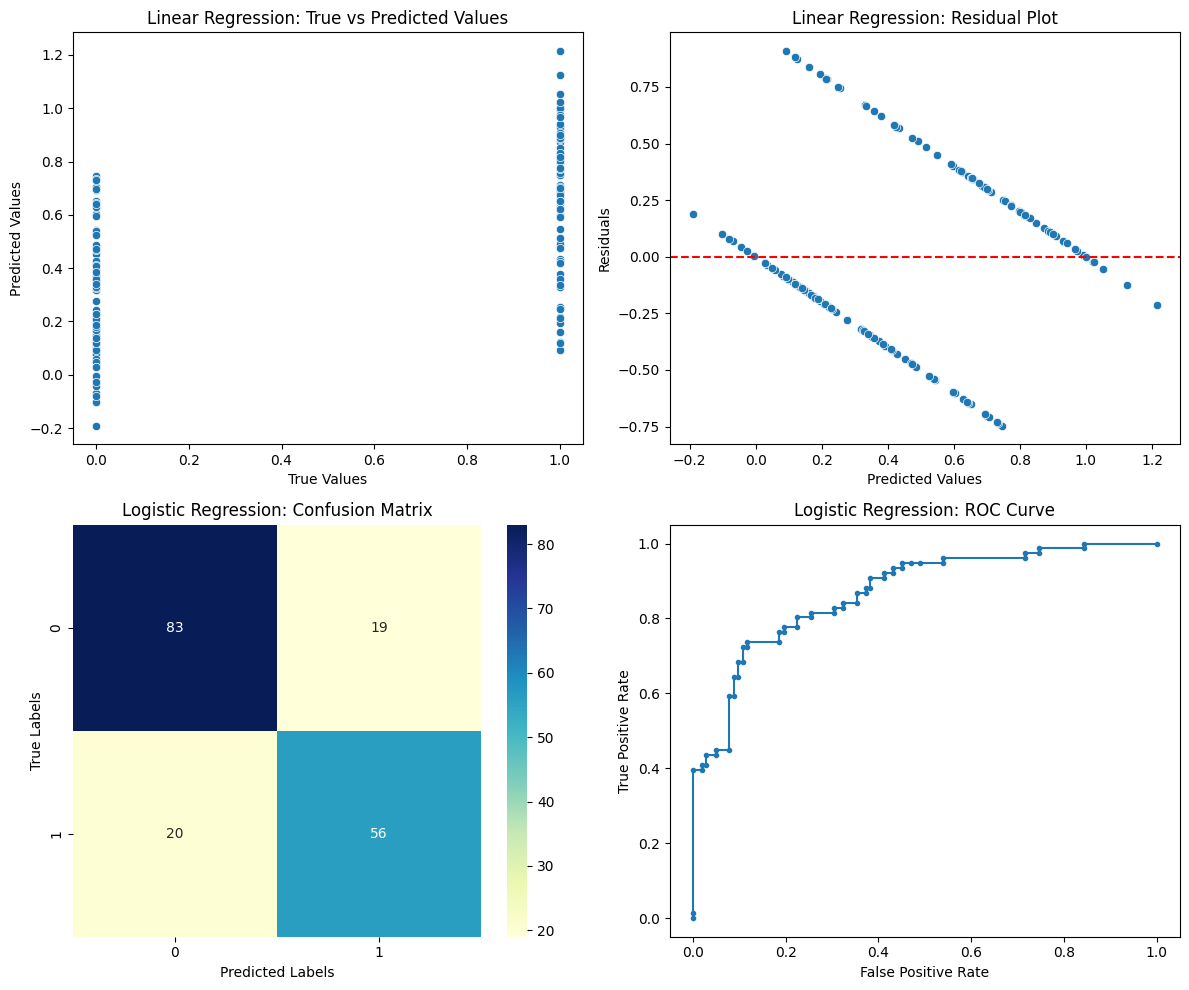

In [75]:
# Linear Regression Predictions
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: True vs Predicted Values")

plt.subplot(2, 2, 2)
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residual Plot")
plt.axhline(0, color='red', linestyle='--')

# Logistic Regression Predictions
plt.subplot(2, 2, 3)
conf_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression: Confusion Matrix")

plt.subplot(2, 2, 4)
# Replace `log_model` with your logistic regression model
fpr, tpr, _ = roc_curve(y_test, rg_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression: ROC Curve")

plt.tight_layout()
plt.show()